# Celery workflow

##  Simple addition

In [17]:
from tasks import add,mul,tSum,concat
from io import StringIO
from graphviz import Source
from IPython.display import Image
from celery import chain
from celery import group
from celery import chord

In [19]:
add(1,2)

3

In [20]:
add_task = add.delay(1,2)
add_task.get()

3

In [21]:
add_task.get()

3

## Chain

In [5]:
res = chain(add.s(0,1),add.s(1),add.s(1)).delay()
res.get()

3

In [6]:
def getRoot(root):
    while root.parent is not None:
        root = root.parent
    return root

def renderGraph(res):
    temp = StringIO()
    root = getRoot(res)
    root.graph.to_dot(temp)
    res = Source(temp.getvalue(),filename="temp",format="png")
    res.render()
    return Image("temp.png")

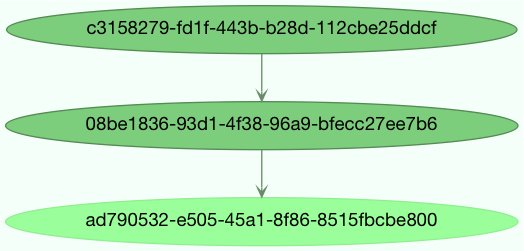

In [7]:
renderGraph(res)

In [8]:
chain = add.s(0,1)

for i in range(5):
    chain |= add.s(1)

res = chain.delay()
res.get()

6

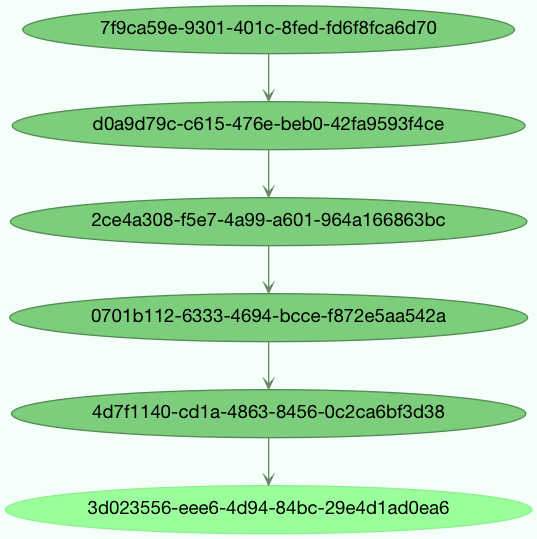

In [9]:
renderGraph(res)

##  Group

In [22]:
header=[mul.s(i,i) for i in range(20)]
print(header)

[tasks.mul(0, 0), tasks.mul(1, 1), tasks.mul(2, 2), tasks.mul(3, 3), tasks.mul(4, 4), tasks.mul(5, 5), tasks.mul(6, 6), tasks.mul(7, 7), tasks.mul(8, 8), tasks.mul(9, 9), tasks.mul(10, 10), tasks.mul(11, 11), tasks.mul(12, 12), tasks.mul(13, 13), tasks.mul(14, 14), tasks.mul(15, 15), tasks.mul(16, 16), tasks.mul(17, 17), tasks.mul(18, 18), tasks.mul(19, 19)]


In [23]:
res = group(header)()

In [24]:
res.get()

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361]

## Chord

In [25]:
header=[mul.s(i,i) for i in range(30)]
callback = tSum.s()
chord(header)(callback).get()

8555

## Chunks

<generator object <genexpr> at 0x105810d68>


In [42]:
header = (add.s(i,i) for i in range(10000))
res = group(header)
print(res)

group([tasks.add(0, 0), add(1, 1), add(2, 2), add(3, 3), add(4, 4), add(5, 5), add(6, 6), add(7, 7), add(8, 8), add(9, 9), add(10, 10), add(11, 11), add(12, 12), add(13, 13), add(14, 14), add(15, 15), add(16, 16), add(17, 17), add(18, 18), add(19, 19), add(20, 20), add(21, 21), add(22, 22), add(23, 23), add(24, 24), add(25, 25), add(26, 26), add(27, 27), add(28, 28), add(29, 29), add(30, 30), add(31, 31), add(32, 32), add(33, 33), add(34, 34), add(35, 35), add(36, 36), add(37, 37), add(38, 38), add(39, 39), add(40, 40), add(41, 41), add(42, 42), add(43, 43), add(44, 44), add(45, 45), add(46, 46), add(47, 47), add(48, 48), add(49, 49), add(50, 50), add(51, 51), add(52, 52), add(53, 53), add(54, 54), add(55, 55), add(56, 56), add(57, 57), add(58, 58), add(59, 59), add(60, 60), add(61, 61), add(62, 62), add(63, 63), add(64, 64), add(65, 65), add(66, 66), add(67, 67), add(68, 68), add(69, 69), add(70, 70), add(71, 71), add(72, 72), add(73, 73), add(74, 74), add(75, 75), add(76, 76), add(77

In [46]:
res.delay().get()

[[0,
  1,
  4,
  9,
  16,
  25,
  36,
  49,
  64,
  81,
  100,
  121,
  144,
  169,
  196,
  225,
  256,
  289,
  324,
  361,
  400,
  441,
  484,
  529,
  576,
  625,
  676,
  729,
  784,
  841,
  900,
  961,
  1024,
  1089,
  1156,
  1225,
  1296,
  1369,
  1444,
  1521,
  1600,
  1681,
  1764,
  1849,
  1936,
  2025,
  2116,
  2209,
  2304,
  2401,
  2500,
  2601,
  2704,
  2809,
  2916,
  3025,
  3136,
  3249,
  3364,
  3481,
  3600,
  3721,
  3844,
  3969,
  4096,
  4225,
  4356,
  4489,
  4624,
  4761,
  4900,
  5041,
  5184,
  5329,
  5476,
  5625,
  5776,
  5929,
  6084,
  6241,
  6400,
  6561,
  6724,
  6889,
  7056,
  7225,
  7396,
  7569,
  7744,
  7921,
  8100,
  8281,
  8464,
  8649,
  8836,
  9025,
  9216,
  9409,
  9604,
  9801,
  10000,
  10201,
  10404,
  10609,
  10816,
  11025,
  11236,
  11449,
  11664,
  11881,
  12100,
  12321,
  12544,
  12769,
  12996,
  13225,
  13456,
  13689,
  13924,
  14161,
  14400,
  14641,
  14884,
  15129,
  15376,
  15625,
  15876,
  1

In [47]:
res = (mul.chunks(zip(range(10000),range(10000)),10000).group())
print(res)

group([[tasks.mul(*x) for x in [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11,...]])


In [48]:
res.delay().get()

[[0,
  1,
  4,
  9,
  16,
  25,
  36,
  49,
  64,
  81,
  100,
  121,
  144,
  169,
  196,
  225,
  256,
  289,
  324,
  361,
  400,
  441,
  484,
  529,
  576,
  625,
  676,
  729,
  784,
  841,
  900,
  961,
  1024,
  1089,
  1156,
  1225,
  1296,
  1369,
  1444,
  1521,
  1600,
  1681,
  1764,
  1849,
  1936,
  2025,
  2116,
  2209,
  2304,
  2401,
  2500,
  2601,
  2704,
  2809,
  2916,
  3025,
  3136,
  3249,
  3364,
  3481,
  3600,
  3721,
  3844,
  3969,
  4096,
  4225,
  4356,
  4489,
  4624,
  4761,
  4900,
  5041,
  5184,
  5329,
  5476,
  5625,
  5776,
  5929,
  6084,
  6241,
  6400,
  6561,
  6724,
  6889,
  7056,
  7225,
  7396,
  7569,
  7744,
  7921,
  8100,
  8281,
  8464,
  8649,
  8836,
  9025,
  9216,
  9409,
  9604,
  9801,
  10000,
  10201,
  10404,
  10609,
  10816,
  11025,
  11236,
  11449,
  11664,
  11881,
  12100,
  12321,
  12544,
  12769,
  12996,
  13225,
  13456,
  13689,
  13924,
  14161,
  14400,
  14641,
  14884,
  15129,
  15376,
  15625,
  15876,
  1